In [1]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import statsmodels.api as sm

sns.set(style="whitegrid")

# ignore warnings because they are distracting 
import warnings
warnings.filterwarnings('ignore')

# suppress the scientific notation when printing numpy arrays
np.set_printoptions(suppress=True)

In [2]:
tables = []
nations = ['US', 'JPN', 'CH', 'UK']

for nation in nations:
    filename = "./data/" + nation + "data.pickle"
    with open(filename, 'rb') as handle:
        data = pickle.load(handle)
        tables.append(data)

us, tokyo, zurich, london = tables

ny_sp500 = us[(us['City'] == 'New York') & (us['Index'] == 'SPX')] 
cities = [zurich, tokyo, london, ny_sp500]
names = ['Zurich', 'Tokyo', 'London', 'New York']

In [3]:
# removing the word Actual from column headers
for city in cities:
    city.columns = [col.replace(" Actual", "") for col in city.columns] 

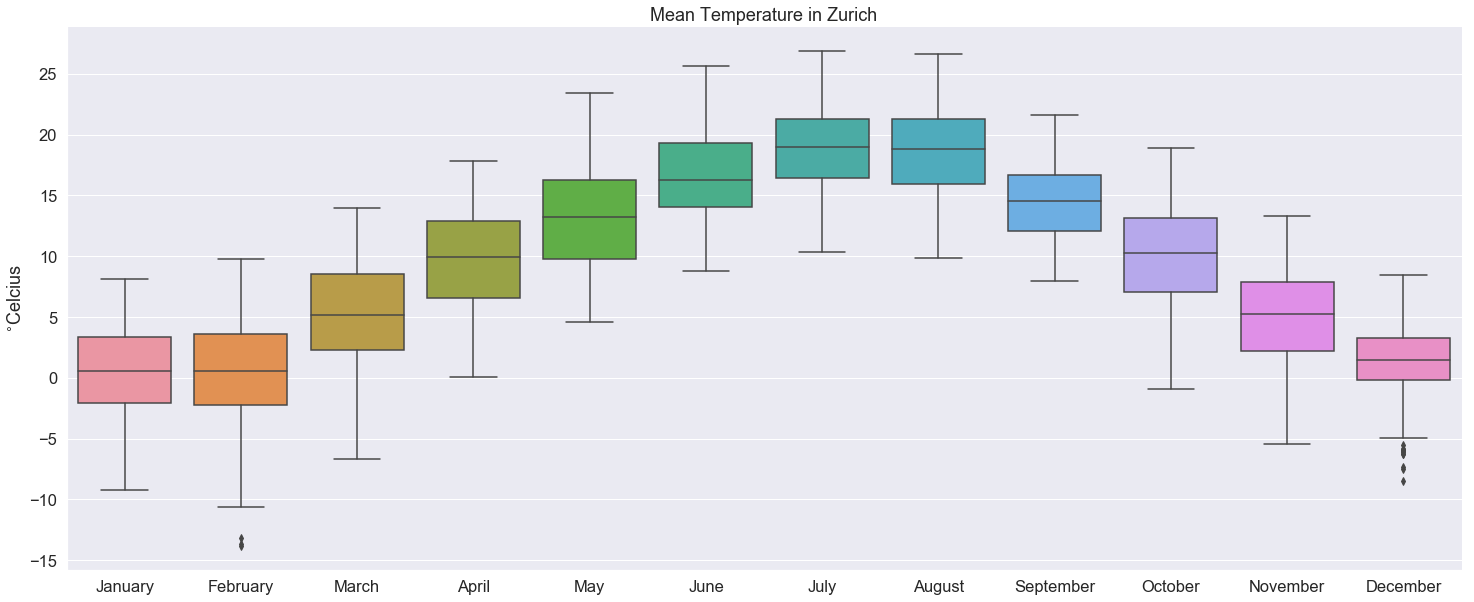

In [4]:
# Boxplot
sns.set(font_scale=1.5)

per_month = []
for i in range(1,13):
    subset = zurich['Mean Temperature'][zurich.index.month == i]
    per_month.append(subset)
    
fontsize = 20
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=per_month);

sns.despine()
ax.set_title("Mean Temperature in Zurich")
ax.set_xticklabels(months)
ax.set_ylabel("$^{\circ}$Celcius");

# did this already
#fig.savefig('./plots/monthly_temperatures_zurich.png')

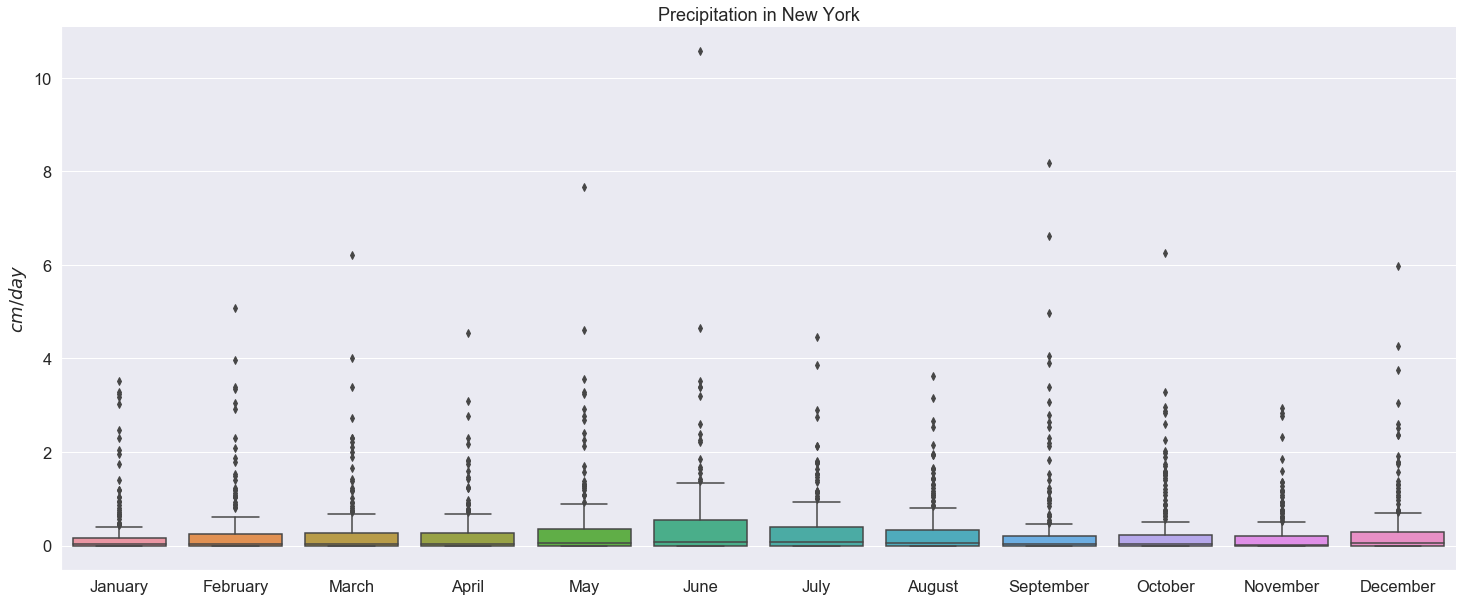

In [5]:
# Boxplot
sns.set(font_scale=1.5)

per_month = []
for i in range(1,13):
    subset = ny_sp500['Precipitation'][ny_sp500.index.month == i]
    per_month.append(subset)
    
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=per_month);

sns.despine()
ax.set_title("Precipitation in New York")
ax.set_xticklabels(months)
ax.set_ylabel("$cm/day$");

# did this already
#fig.savefig('./plots/monthly_temperatures_zurich.png')

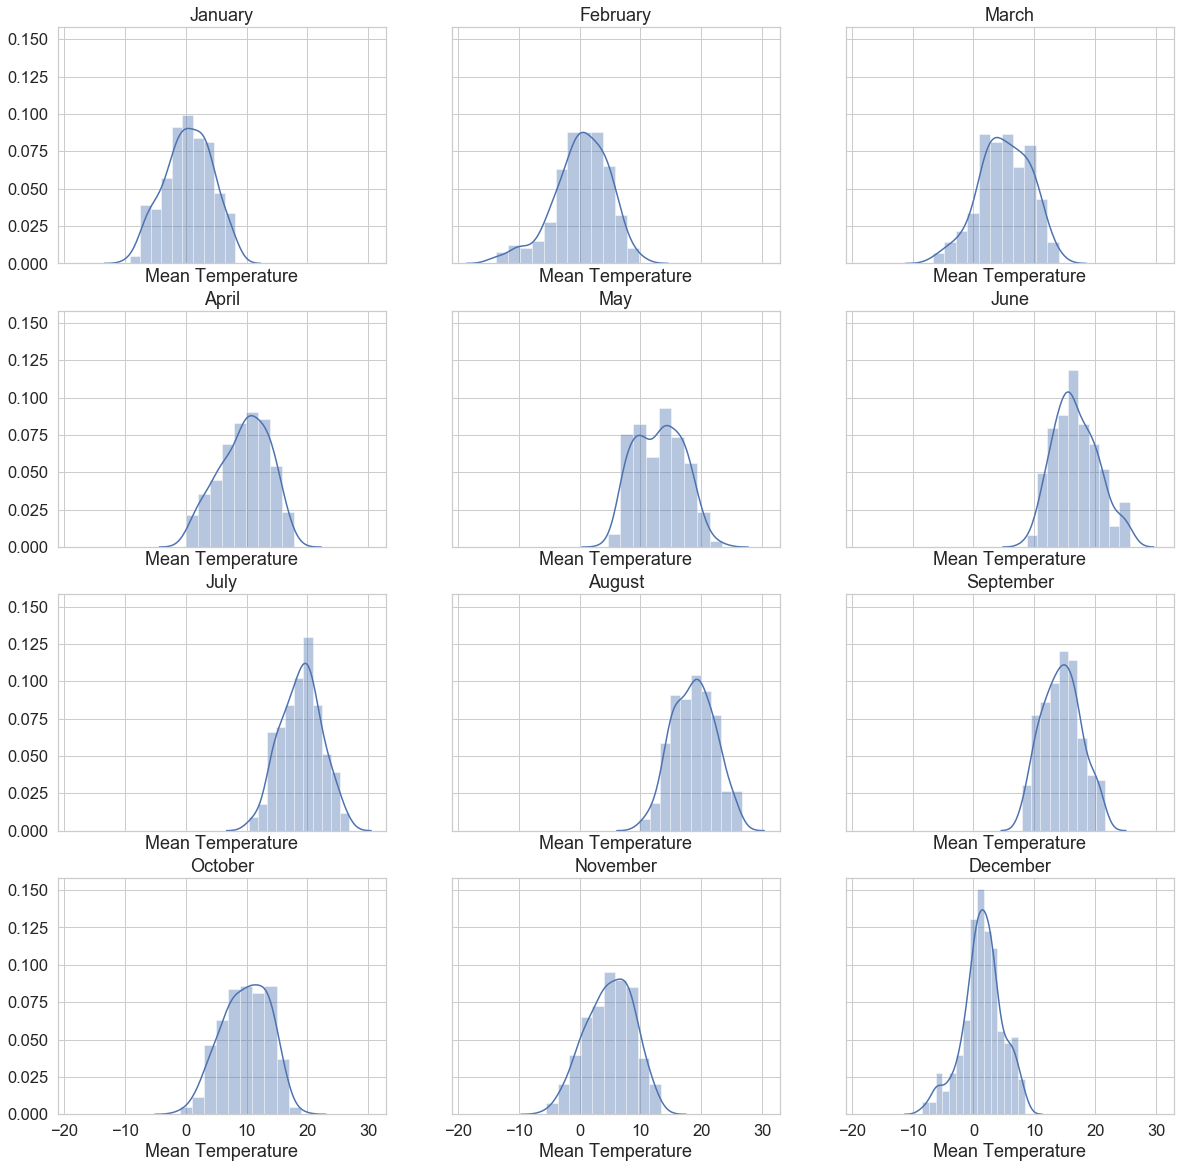

In [6]:
sns.set_style("whitegrid")

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=4, ncols=3,
                         sharex=True, sharey=True,
                         figsize=(20,20)
                        )


for month_i, ax in enumerate(axes.flatten()):
    
    subset = zurich[zurich.index.month == month_i+1]
    sns.distplot(subset['Mean Temperature'], kde=True, ax=ax)
    ax.set_title(months[month_i])
    
# Save the full figure...
#fig.savefig('./plots/monthly_temperatures.png')

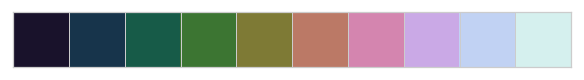

In [7]:
sns.palplot(sns.color_palette("cubehelix", 10))

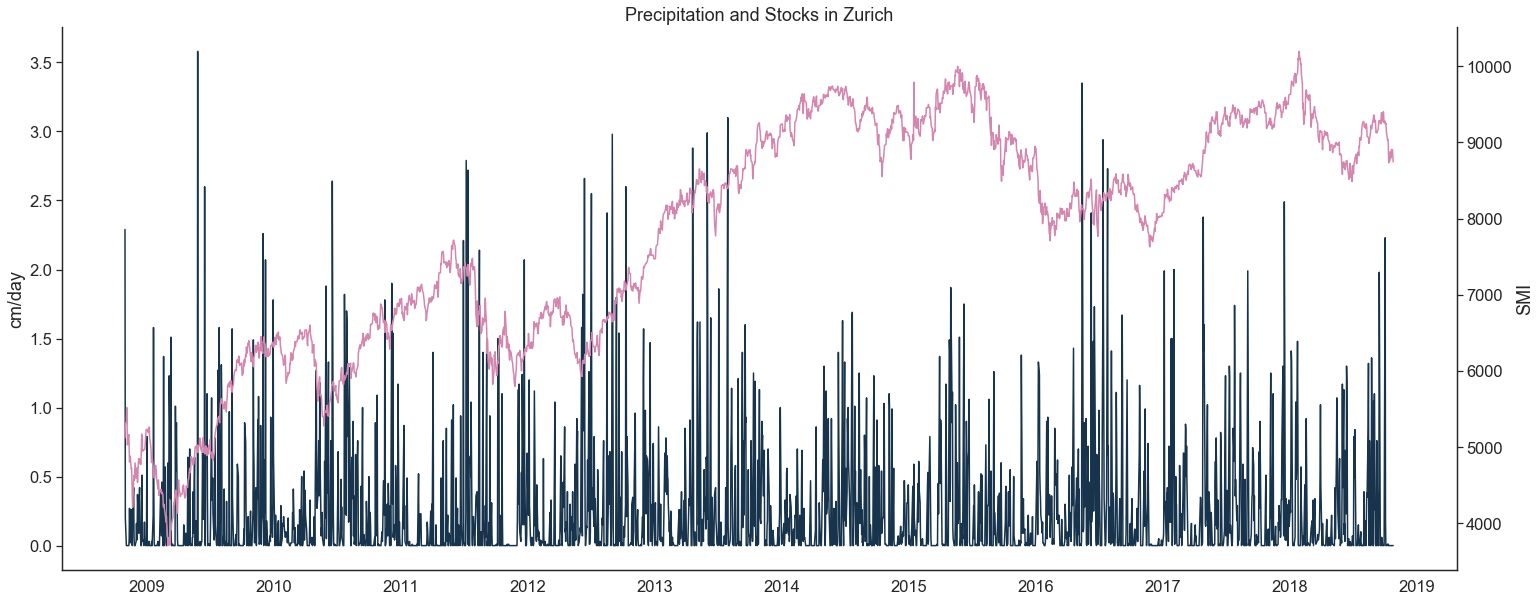

In [8]:
subset = zurich#[zurich.index.year == 2018] 

sns.set_style('white')
#sns.set_palette(sns.color_palette("cubehelix", 8))

fig, ax = plt.subplots(figsize=(25,10))
sns.lineplot(data=subset['Precipitation'], color=sns.color_palette("cubehelix", 10)[1])

ax2 = plt.twinx()
sns.lineplot(data=subset['Price Close'], ax=ax2, color=sns.color_palette("cubehelix", 10)[-4])
ax2.set_ylabel("SMI");

ax.set_title("Precipitation and Stocks in Zurich")
ax.set_ylabel("cm/day");

sns.despine(right=False)
#plt.savefig("plots/precip_zurich.png");

# Returns

In [9]:
for city in cities:
    city['logreturns'] = np.log(city['Price Close'] / city['Price Close'].shift(-1))

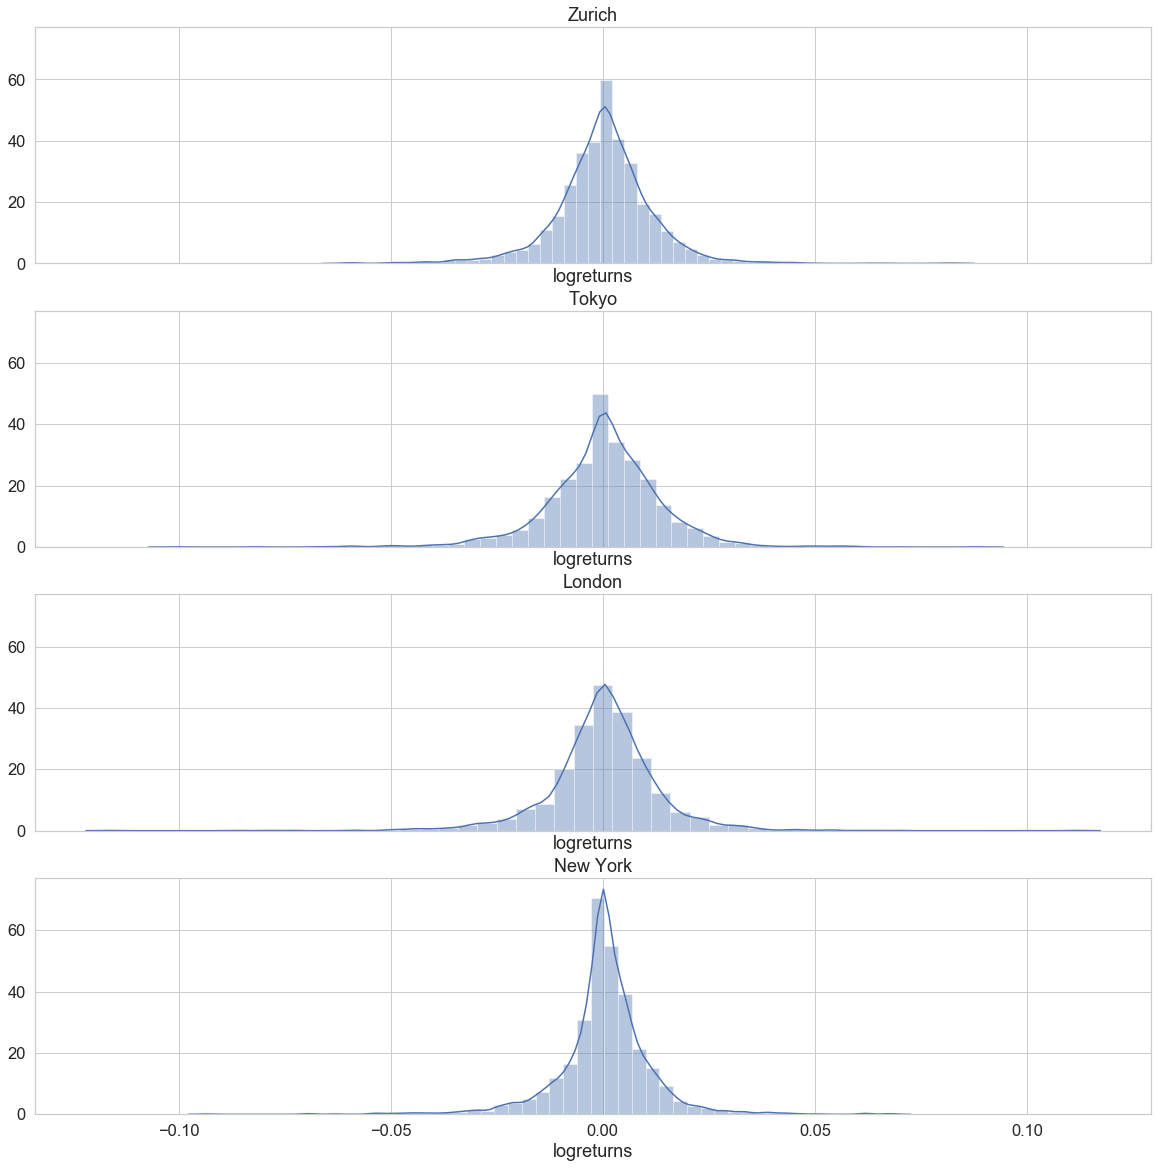

In [11]:
sns.set_style("whitegrid")
# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=len(cities), ncols=1,
                         sharex=True, sharey=True,
                         figsize=(20,20)
                        )

for i, ax in enumerate(axes.flatten()):
    city = cities[i]
    sns.distplot(city['logreturns'].dropna(), kde=True, ax=ax)
    ax.set_title(names[i])
    
# Save the full figure...
#fig.savefig('./plots/monthly_temperatures.png')

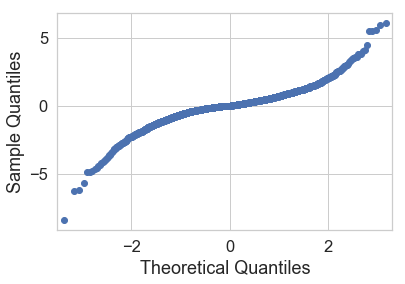

In [12]:
a = np.random.normal(5,5,250)
standardized = (ny_sp500['logreturns'] - ny_sp500['logreturns'].mean()) / ny_sp500['logreturns'].std()
sm.qqplot(standardized, line='s')
plt.show()

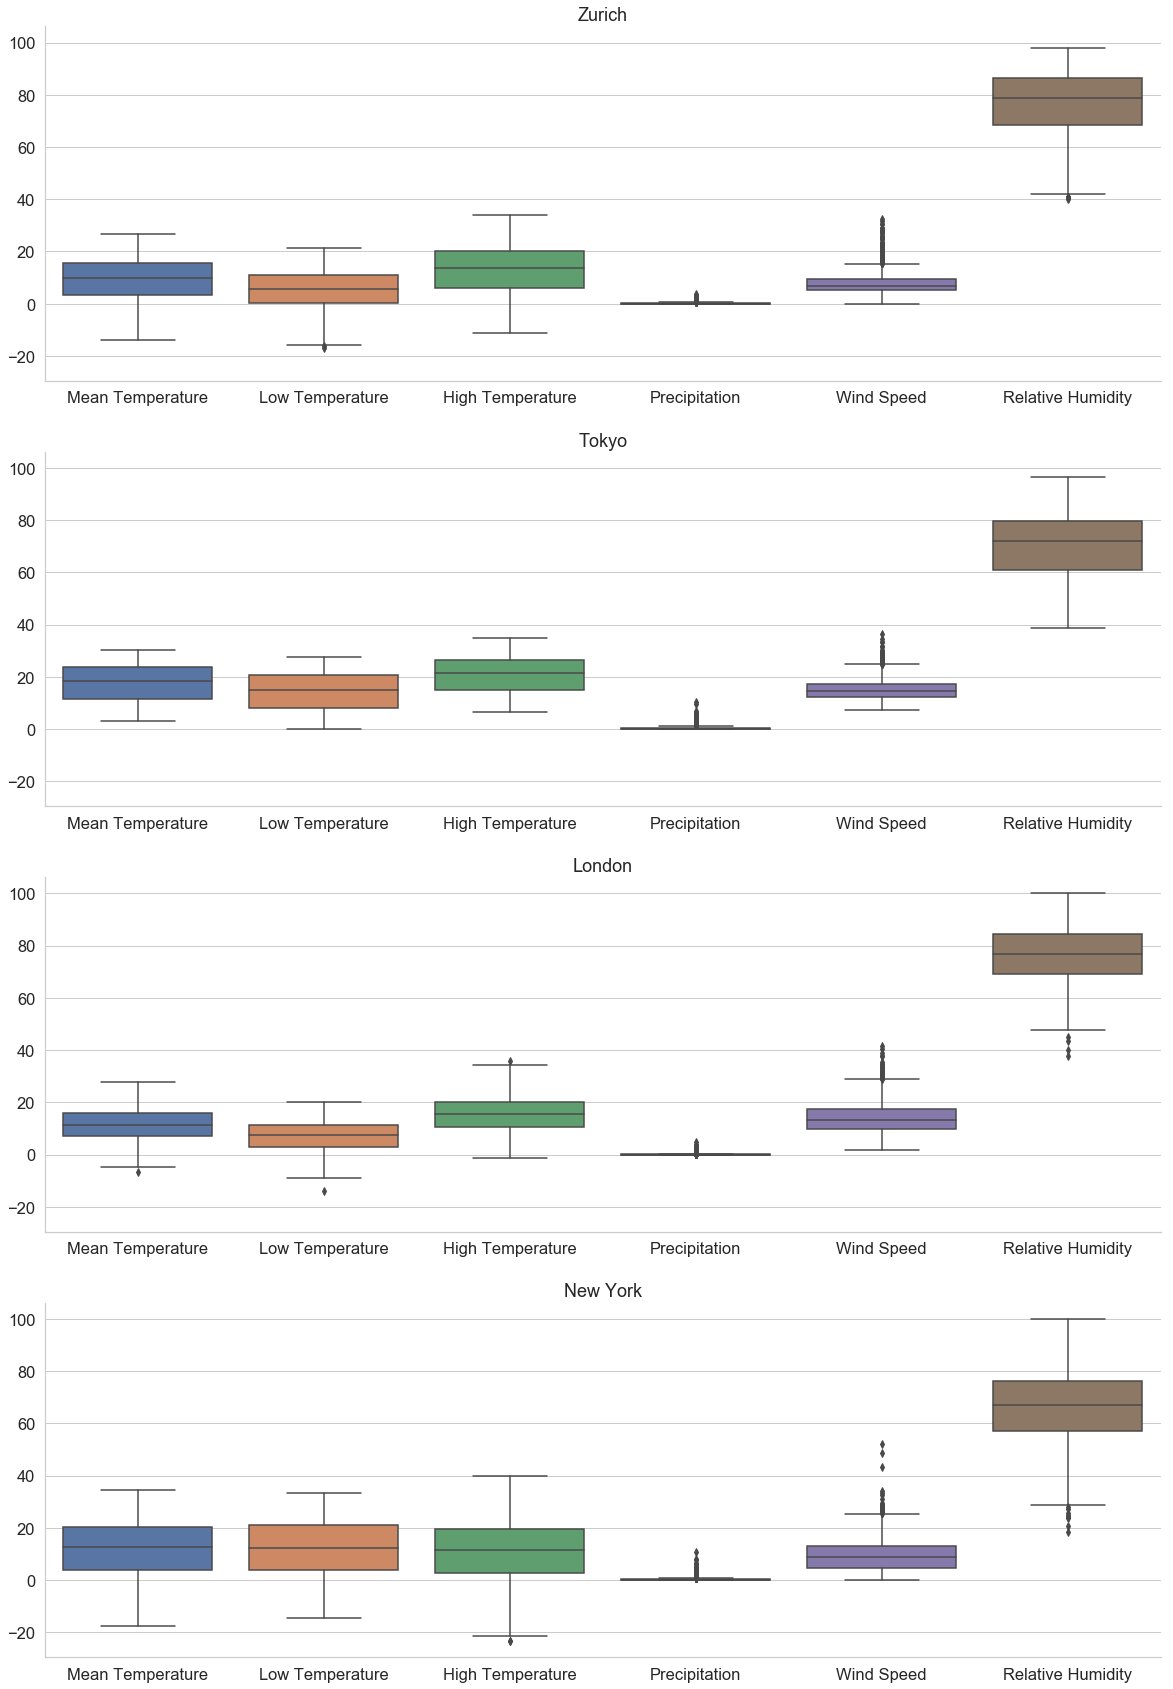

In [13]:
sns.set_style("whitegrid")


# assumes (nrows x ncols) episodes
fig, axes = plt.subplots(nrows=4, ncols=1,
                         sharex=False, sharey=True,
                         figsize=(20,30)
                        )
weather_columns = ['Mean Temperature', 'Low Temperature', 'High Temperature', 'Precipitation', 'Wind Speed', 'Relative Humidity']

for i, ax in enumerate(axes.flatten()):
    city = cities[i]
    sns.boxplot(data=city[weather_columns], ax=ax)
    ax.set_title(names[i])
    sns.despine()

# Scatterplot matrix

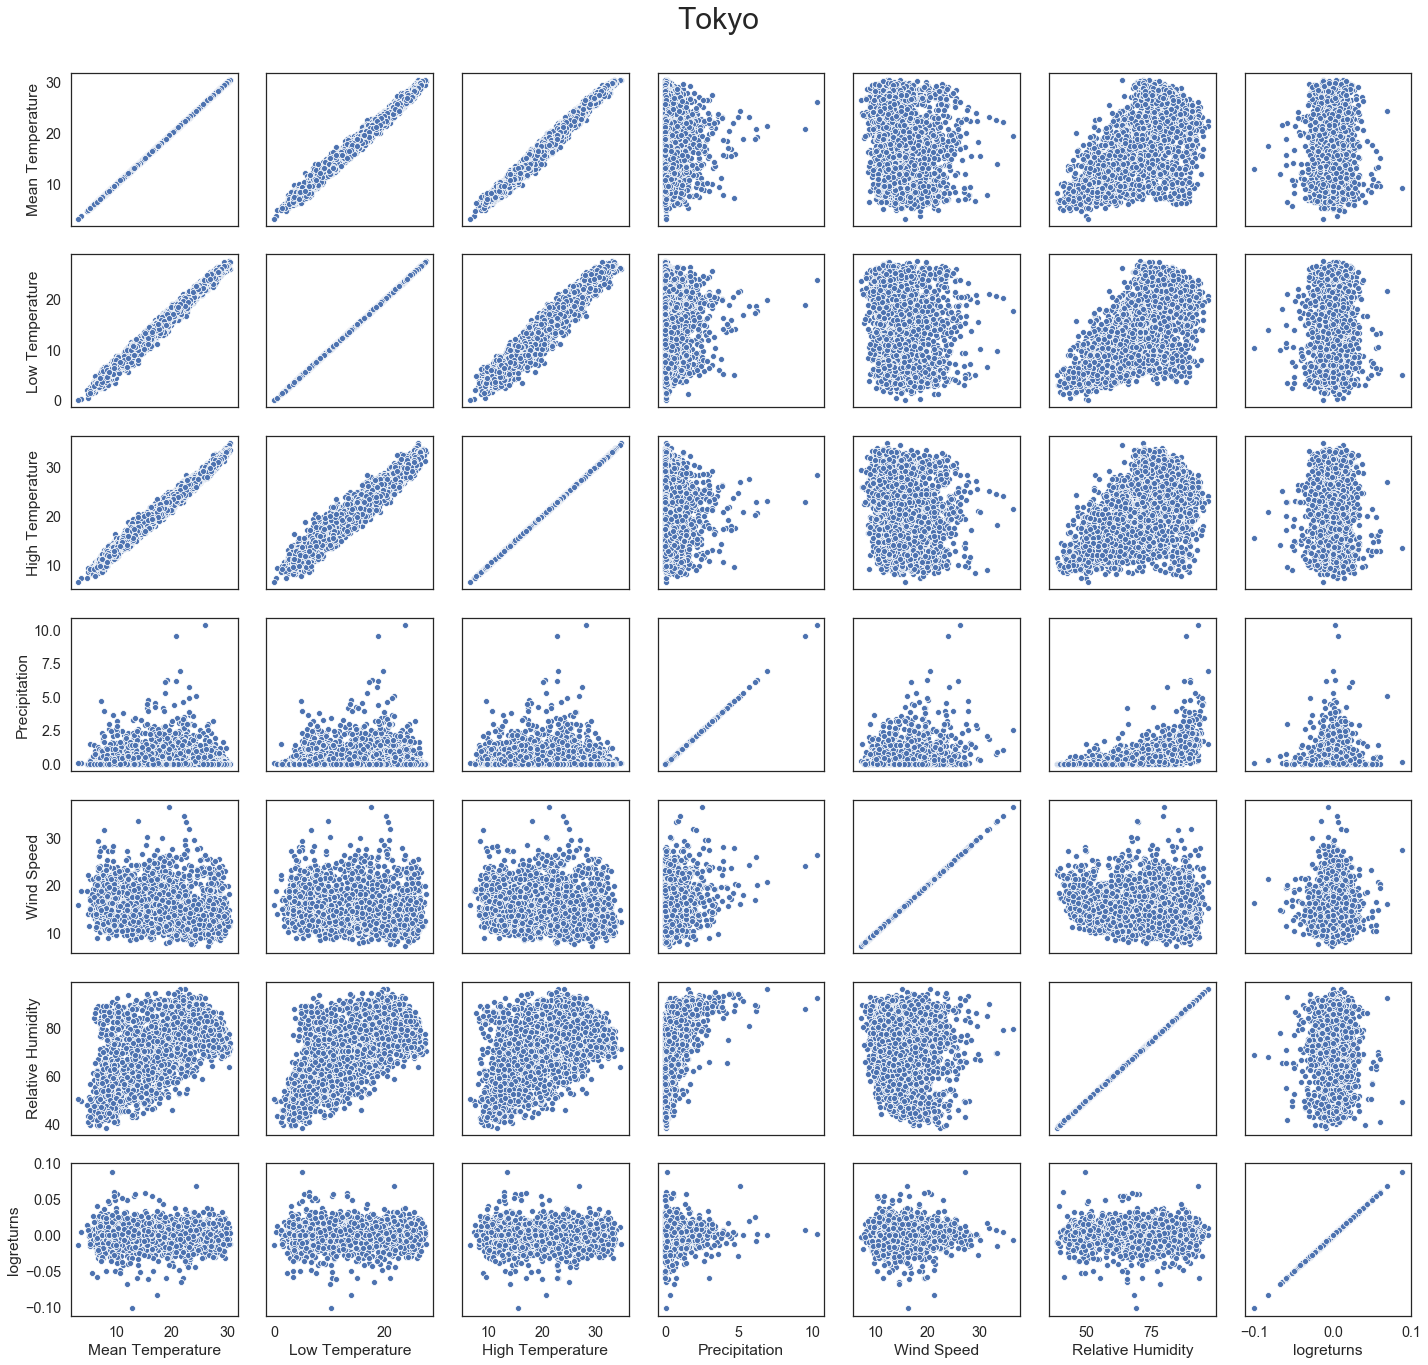

In [20]:
sns.set(font_scale=1.3)
sns.set_style("white")

data = tokyo.select_dtypes(include=[np.number]).drop(columns='Price Close')

fig, axes = plt.subplots(nrows=len(data.columns), ncols=len(data.columns),
                         sharex=False, sharey=False,
                         figsize=(20,20)
                        )

for i, ax in enumerate(axes.flatten()):
    xax=i%len(data.columns)
    yax=i//len(data.columns)
    sns.scatterplot(x=data.columns[xax], y=data.columns[yax], data=data, ax=ax)
    if xax != 0:
        ax.set_ylabel("")
        ax.set_yticklabels("")
    if yax != len(data.columns)-1:
        ax.set_xlabel("")
        ax.set_xticklabels("")


fig.tight_layout(rect=[0, 0.03, 1, 0.95])
fig.suptitle("Tokyo", fontsize=30)
plt.savefig("./plots/scatterplots_tokyo.png")